In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

base_url = r'/home/amit/DataScienceProject/PredictDroughts/'

In [3]:
df = pd.read_csv(base_url + 'files/merge.csv', index_col=0)
df['Week'] = pd.to_datetime(df['Week'], infer_datetime_format=True)
df

,Week,State,Postal Code,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,QV2M,T2M_RANGE,...,TS,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,LEVEL
0,2000-01-04,Alabama,AL,1,-86.902298,32.318231,12.35,2.14,6.84,15.39,...,12.18,5.24,8.80,5.44,3.30,100.72,6.95,2.85,6.97,1
1,2000-01-11,Alabama,AL,1,-86.902298,32.318231,0.97,1.18,7.09,13.70,...,11.15,4.09,6.18,2.51,1.33,100.83,8.89,5.91,8.89,1
2,2000-01-18,Alabama,AL,1,-86.902298,32.318231,1.80,1.59,9.91,6.50,...,14.94,2.75,6.29,3.87,2.28,100.82,13.94,11.96,13.94,1
3,2000-01-25,Alabama,AL,1,-86.902298,32.318231,0.00,2.20,2.15,10.89,...,0.24,3.71,7.61,4.35,2.16,100.53,-7.34,-4.39,-7.14,1
4,2000-02-01,Alabama,AL,1,-86.902298,32.318231,0.01,0.73,3.38,15.38,...,2.15,5.12,6.04,2.41,1.69,101.43,-1.58,-3.99,-1.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56810,2021-05-11,Wyoming,WY,56,-107.290284,43.075968,0.70,2.00,3.90,10.46,...,3.88,4.09,7.08,6.11,4.11,81.57,-2.45,-2.92,0.02,2
56811,2021-05-18,Wyoming,WY,56,-107.290284,43.075968,0.00,0.47,6.54,17.38,...,17.56,6.01,6.73,3.36,2.89,80.75,4.49,6.61,10.45,1
56812,2021-05-25,Wyoming,WY,56,-107.290284,43.075968,0.11,0.95,5.07,16.60,...,13.43,7.49,9.18,6.45,5.50,81.35,1.03,3.02,6.50,1
56813,2021-06-01,Wyoming,WY,56,-107.290284,43.075968,1.19,1.75,7.33,12.02,...,17.39,3.61,6.54,4.33,2.58,81.70,6.35,9.74,11.27,1


Text(0.5, 1.0, 'Drought hist level count')

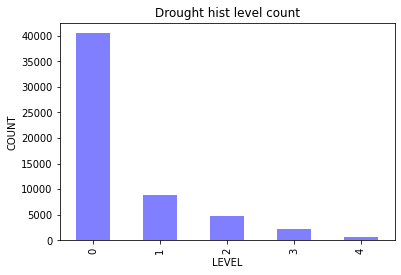

In [4]:
df.LEVEL.value_counts().head(5).plot(kind='bar', color='blue', alpha=0.5)
plt.xlabel('LEVEL')
plt.ylabel('COUNT')
plt.title('Drought hist level count')

Text(0.5, 1.0, 'Total Drought Hist Level Count')

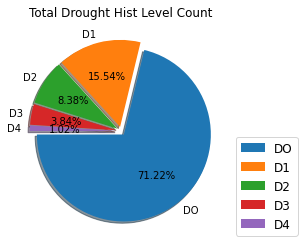

In [5]:
dfLevelD0 = df[df['LEVEL'] == 0].reset_index(drop=True)
dfLevelD1 = df[df['LEVEL'] == 1].reset_index(drop=True)
dfLevelD2 = df[df['LEVEL'] == 2].reset_index(drop=True)
dfLevelD3 = df[df['LEVEL'] == 3].reset_index(drop=True)
dfLevelD4 = df[df['LEVEL'] == 4].reset_index(drop=True)
sizes = [len(dfLevelD0), len(dfLevelD1), len(dfLevelD2), len(dfLevelD3), len(dfLevelD4)]
labels = ['DO', 'D1', 'D2', 'D3', 'D4']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=180)
ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
plt.title('Total Drought Hist Level Count')

Text(0, 0.5, 'Longitude')

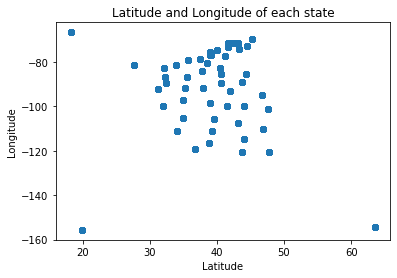

In [7]:
ax = plt.axes()
ax.scatter(df.Latitude, df.Longitude)
plt.title('Latitude and Longitude of each state')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

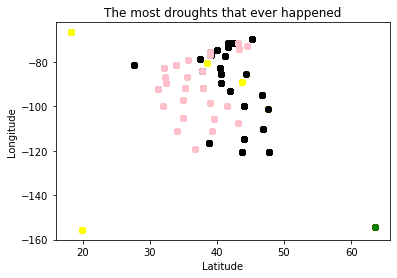

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df.Latitude, df.Longitude)
ax.scatter(df.Latitude[df.LEVEL == 0], df.Longitude[df.LEVEL == 0], c='red')
ax.scatter(df.Latitude[df.LEVEL == 1], df.Longitude[df.LEVEL == 1], c='green')
ax.scatter(df.Latitude[df.LEVEL == 2], df.Longitude[df.LEVEL == 2], c='yellow')
ax.scatter(df.Latitude[df.LEVEL == 3], df.Longitude[df.LEVEL == 3], c='black')
ax.scatter(df.Latitude[df.LEVEL == 4], df.Longitude[df.LEVEL == 4], c='pink')
plt.title('The most droughts that ever happened')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

(-0.5, 999.5, 399.5, -0.5)

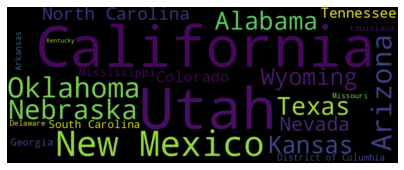

In [19]:
stateLevel4 = df.State[df['LEVEL'] == 4]
wc = WordCloud(width=1000, height=400, max_words=200,).generate_from_frequencies(stateLevel4.value_counts())
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

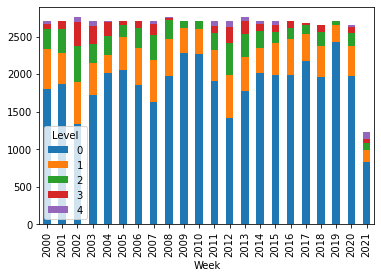

In [20]:
ct = pd.crosstab(df['Week'].dt.year, df['LEVEL'])
ct.plot.bar(stacked=True)
plt.legend(title='Level')

Text(0, 0.5, 'Count')

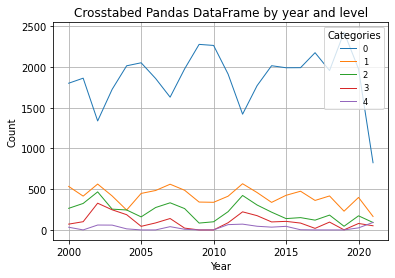

In [22]:
pd.crosstab(df['Week'].dt.year, df['LEVEL']).plot(linewidth=1, grid=True)
plt.title('Crosstabed Pandas DataFrame by year and level')
plt.legend(loc=1, fontsize = 'small', title='Categories')
plt.xlabel('Year')
plt.ylabel('Count')

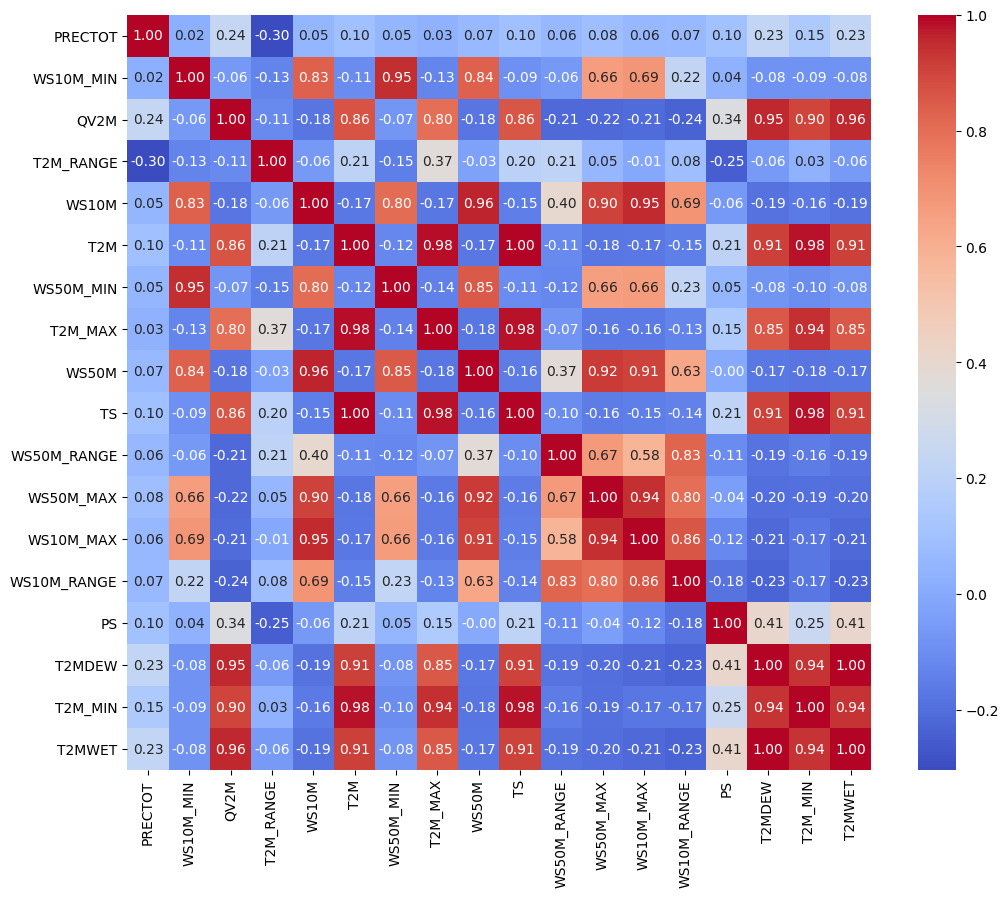

In [23]:
fig=plt.figure(figsize=(12,10),dpi=100)
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
g = sns.heatmap(df[["PRECTOT", "WS10M_MIN", "QV2M","T2M_RANGE","WS10M","T2M","WS50M_MIN",
                        "T2M_MAX","WS50M","TS", "WS50M_RANGE","WS50M_MAX","WS10M_MAX","WS10M_RANGE",
                        "PS","T2MDEW", "T2M_MIN", "T2MWET"]].corr(), ax=ax0, annot=True, 
                        fmt=".2f", cmap="coolwarm")